<a href="https://colab.research.google.com/github/aleksficek/Face-Mask-Detector/blob/main/maskyolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd gdrive
%cd My\ Drive
%cd darknet
%cd ultra

/content/gdrive
/content/gdrive/My Drive
/content/gdrive/My Drive/darknet
/content/gdrive/My Drive/darknet/ultra


In [4]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [5]:
# !git clone https://github.com/ultralytics/yolov3  # clone
%cd yolov3

/content/gdrive/My Drive/darknet/ultra/yolov3


Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/2 data/samples/bus.jpg: 512x384 3 persons, 1 buss, 1 ties, Done. (0.040s)
image 2/2 data/samples/zidane.jpg: 288x512 3 persons, 1 ties, Done. (0.033s)
Results saved to /content/gdrive/My Drive/darknet/ultra/yolov3/output
Done. (1.259s)


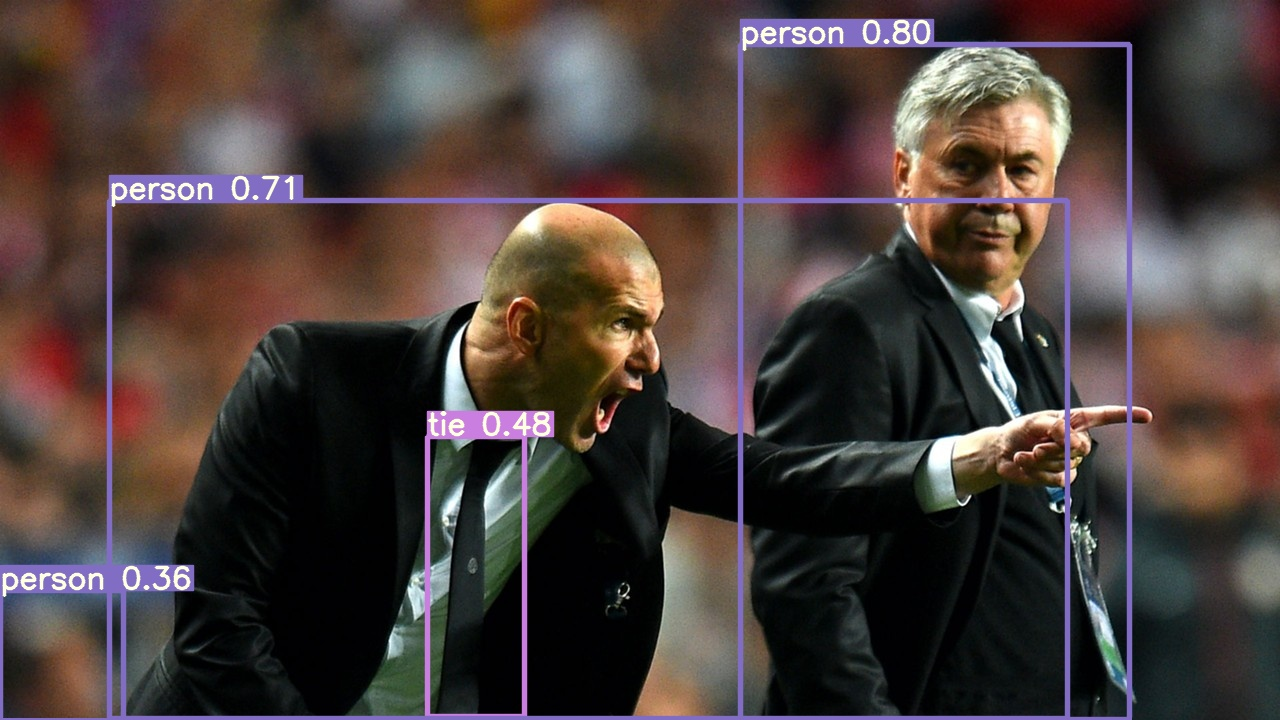

In [6]:
!python3 detect.py
Image(filename='output/zidane.jpg', width=600)

In [9]:
# !python3 train.py --data /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.data --img-size 320 --epochs 1 --batch-size 16 --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg --weights /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-spp-ultralytics.pt

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='/content/gdrive/My Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg', data='/content/gdrive/My Drive/darknet/dataset/yolo/obj.data', device='', epochs=1, evolve=False, freeze_layers=False, img_size=[320], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='/content/gdrive/My Drive/darknet/dataset/yolo/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-10-30 20:57:35.062775: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.25787e+07 parameters, 6.25787e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
Caching labels /co

In [10]:
!python3 detect.py --names /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.names --weights /content/gdrive/My\ Drive/darknet/dataset/yolo/best.pt --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg  --source /content/gdrive/My\ Drive/darknet/dataset/jlin.jpg --conf-thres 0.3 --iou-thres 0.6


Namespace(agnostic_nms=False, augment=False, cfg='/content/gdrive/My Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='/content/gdrive/My Drive/darknet/dataset/yolo/obj.names', output='output', save_txt=False, source='/content/gdrive/My Drive/darknet/dataset/jlin.jpg', view_img=False, weights='/content/gdrive/My Drive/darknet/dataset/yolo/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25787e+07 parameters, 6.25787e+07 gradients
image 1/1 /content/gdrive/My Drive/darknet/dataset/jlin.jpg: 512x448 1 Masks, Done. (0.043s)
Results saved to /content/gdrive/My Drive/darknet/ultra/yolov3/output
Done. (0.130s)


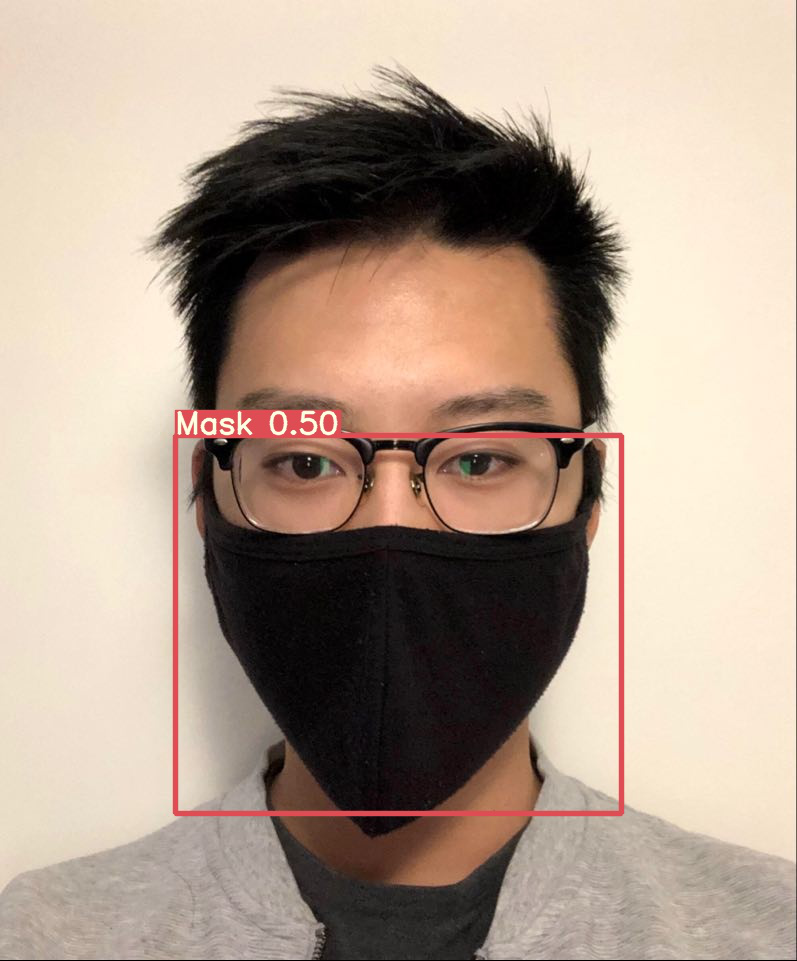

In [11]:
from PIL import Image
Image.open('/content/gdrive/My Drive/darknet/ultra/yolov3/output/jlin.jpg')